In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import adjusted_rand_score
from sklearn import cluster

In [2]:
# 产生分隔的高斯分布的聚类簇 样本分布见 6-1
# centers 核心点的数组
# num 样本数
# std 每簇的标准差
def create_data(centers,num=1000,std=0.7):
    x, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return x, labels_true

In [9]:
def test_DBSCAN(*data):
    x,labels_true = data
    dbscan = cluster.DBSCAN()
    predicted_labels = dbscan.fit_predict(x)
    print('ARI:{0}'.format(adjusted_rand_score(labels_true,predicted_labels))) #ARI 可以理解为聚类效果 越大越好
    print('Core sample num: {0}'.format(len(dbscan.core_sample_indices_))) # 根据密度划分了多少个簇
    

In [10]:
x, labels_true = create_data(((1,1),(2,2),(1,2),(10,20)),1000,0.5)
test_DBSCAN(x, labels_true)

ARI:0.33145663777392786
Core sample num: 991


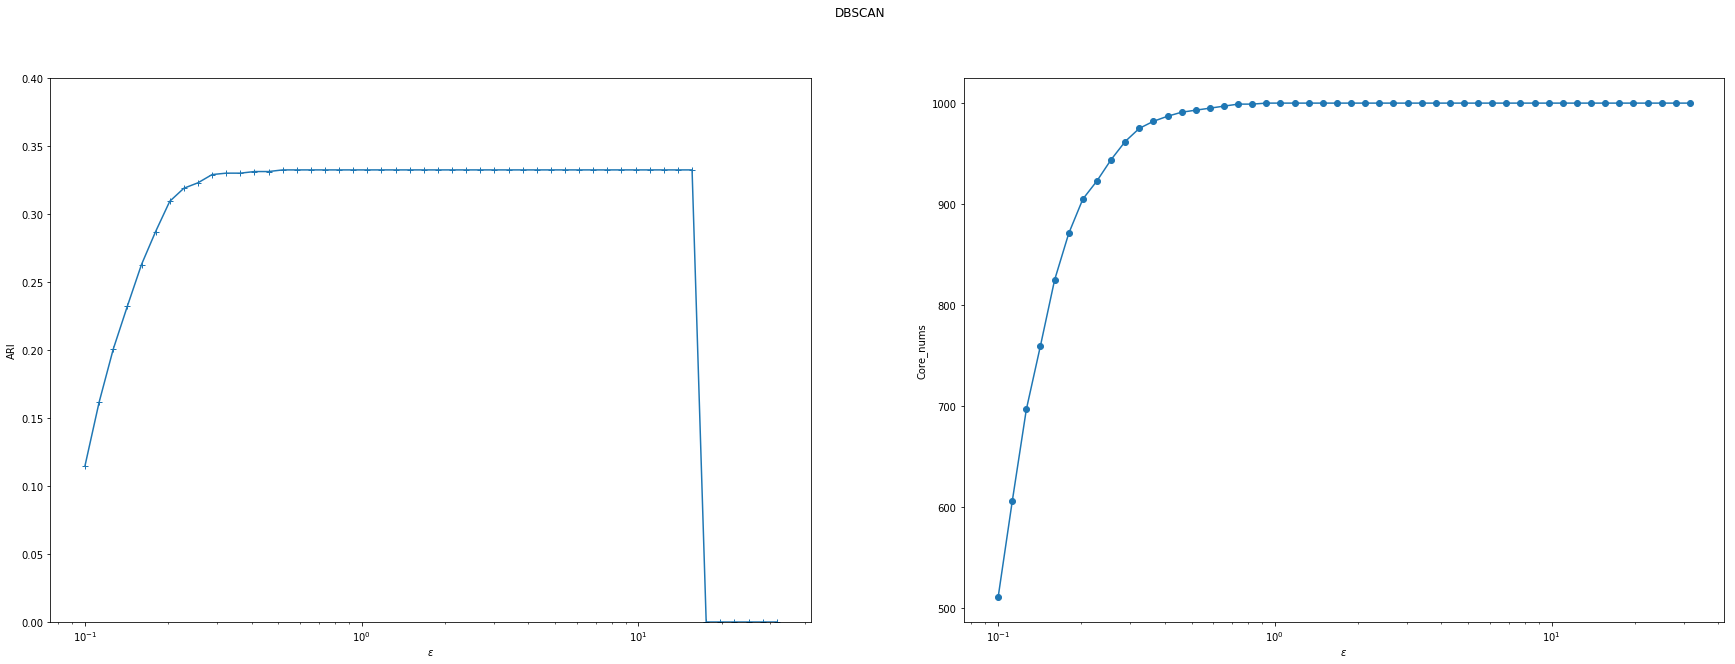

In [15]:
# 参数epsilon的影响
def test_DBSCAN_epsilon(*data):
    x,labels_true = data
    epsilons = np.logspace(-1,1.5)
    nums = range(1,15)
    ARIs =[]
    Core_nums = []
    for epsilon in epsilons:
        dbscan = cluster.DBSCAN(eps=epsilon)
        predicted_labels = dbscan.fit_predict(x)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        Core_nums.append(len(dbscan.core_sample_indices_))
        
    # 绘图
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(30)
    ax = fig.add_subplot(121)
    ax.plot(epsilons, ARIs, marker='+')
    ax.set_xscale('log')
    ax.set_xlabel(r'$\epsilon$')
    ax.set_ylabel('ARI')
    ax.set_ylim(0,0.4)
    
    ax = fig.add_subplot(122)
    ax.plot(epsilons, Core_nums, marker='o')
    ax.set_xscale('log')
    ax.set_xlabel(r'$\epsilon$')
    ax.set_ylabel('Core_nums')
    fig.suptitle('DBSCAN')
    plt.show()

x, labels_true = create_data(((1,1),(2,2),(1,2),(10,20)),1000,0.5)
test_DBSCAN_epsilon(x, labels_true)

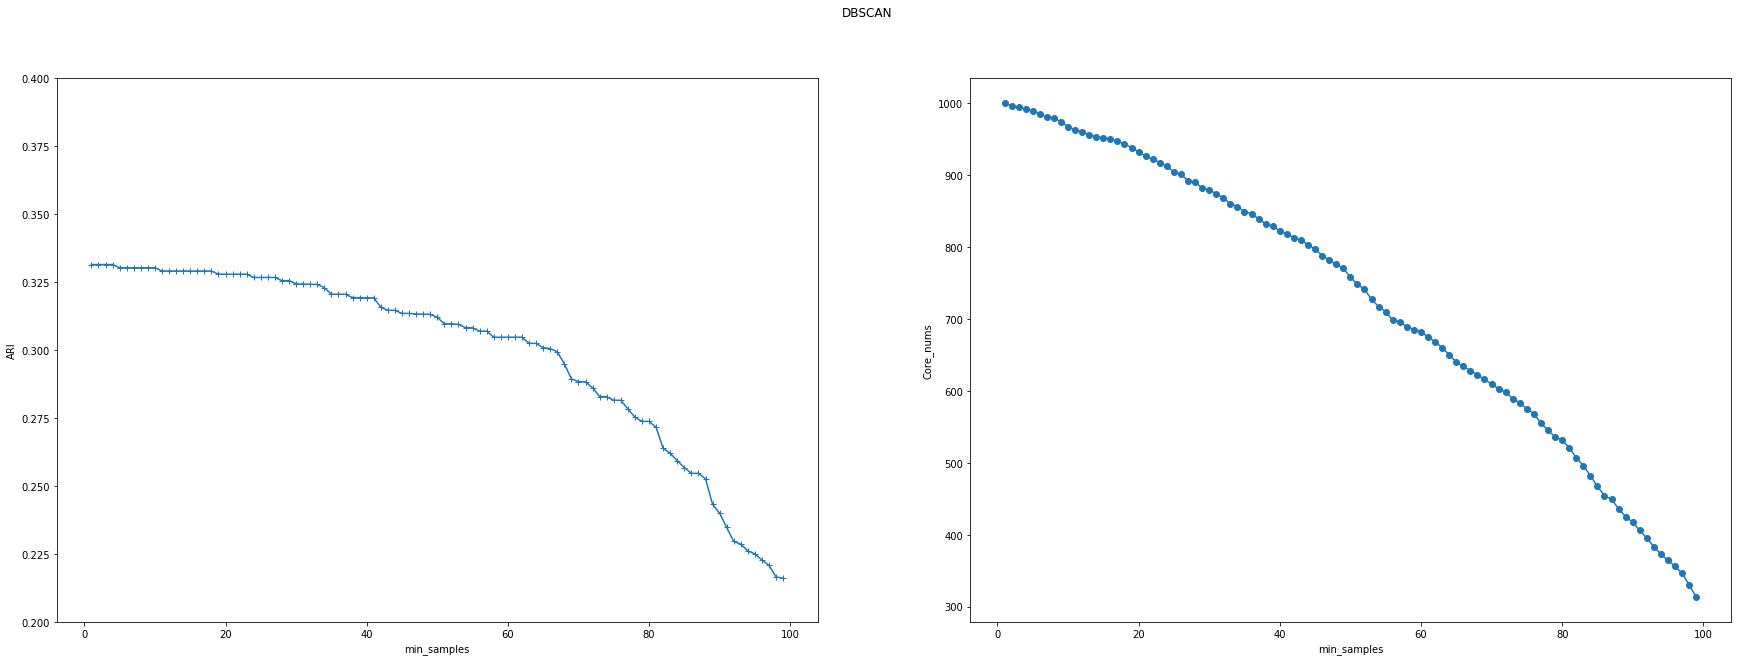

In [19]:
# minpts的影响
def test_DBSCAN_min_samples(*data):
    x,labels_true = data
    min_samples = range(1,100)

    
    ARIs =[]
    Core_nums = []
    for num in min_samples:
        dbscan = cluster.DBSCAN(min_samples=num)
        predicted_labels = dbscan.fit_predict(x)
        ARIs.append(adjusted_rand_score(labels_true,predicted_labels))
        Core_nums.append(len(dbscan.core_sample_indices_))
        
    # 绘图
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(30)
    ax = fig.add_subplot(121)
    ax.plot(min_samples, ARIs, marker='+')
    ax.set_xlabel(r'min_samples')
    ax.set_ylabel('ARI')
    ax.set_ylim(0.2,0.4)
    
    ax = fig.add_subplot(122)
    ax.plot(min_samples, Core_nums, marker='o')
    ax.set_xlabel(r'min_samples')
    ax.set_ylabel('Core_nums')
    fig.suptitle('DBSCAN')
    plt.show()

x, labels_true = create_data(((1,1),(2,2),(1,2),(10,20)),1000,0.5)
test_DBSCAN_min_samples(x, labels_true)